In [2]:
#00. 패키지 호출
import pandas as pd 
import numpy as np 
import warnings 
import datetime
import matplotlib as mpl
import matplotlib.pylab as plt
from sklearn.linear_model import ElasticNet # 엘라스틱넷
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error,accuracy_score

#00-1. warning message ignore 
warnings.filterwarnings(action='ignore')

#00-2. 난수씨드값 지정하기.
np.random.seed(2021)

#00-3. 시각화 옵션 설정하기. 
%matplotlib inline

In [3]:
# load data
df_딸기_복분자_블루베리 = pd.read_csv("C:/ken/elasticnet/딸기_복분자_블루베리.csv")
df_딸기_복분자_블루베리.head()

,date,PC1,PC2,딸기_복분자_블루베리
0,2018-01-01T00:00:00Z,-3.719474,0.965108,371.750837
1,2018-01-02T00:00:00Z,-3.741912,0.888377,434.194537
2,2018-01-03T00:00:00Z,-4.074829,0.748572,467.412613
3,2018-01-04T00:00:00Z,-4.325838,0.235772,481.520820
4,2018-01-05T00:00:00Z,-3.772842,0.246325,507.997147


In [4]:
# 원본 보관하기.  
df_딸기_복분자_블루베리_raw = df_딸기_복분자_블루베리

# 날짜 컬럼 인덱스로 지정하기. 
df_딸기_복분자_블루베리 = df_딸기_복분자_블루베리.set_index('date')

# train, test 데이터셋을 연속적으로 분할하기. 
X_train = df_딸기_복분자_블루베리.iloc[0:365,:-1]
y_train = df_딸기_복분자_블루베리.iloc[0:365,-1]
X_test  = df_딸기_복분자_블루베리.iloc[365:730,:-1]
y_test  = df_딸기_복분자_블루베리.iloc[365:730,-1]

# 데이터셋 차원 확인하기.
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((365, 2), (365,), (365, 2), (365,))

In [5]:
# 모형 생성
model_elastic = ElasticNet()
model_elastic.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [6]:
# GridSearch를 위한 하이퍼파라미터 값 지정하기
params = {
    'alpha' : [0.0001,0.01,1,2,3,4],
    'l1_ratio' : [0.5, 0.7]
}

# GridsearchCV() 메서드를 이용해 훈련 모델 할당하기. 
gscv_model_elastic = GridSearchCV(model_elastic, param_grid=params, cv=10)

# 모형 학습하기. 
gscv_model_elastic.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': [0.0001, 0.01, 1, 2, 3, 4],
                         'l1_ratio': [0.5, 0.7]})

In [7]:
# 최적 하이퍼 파라미터 확인하기. 
gscv_model_elastic.best_params_

{'alpha': 0.01, 'l1_ratio': 0.5}

In [8]:
gscv_model_elastic.best_score_

-14.306760304201116

In [9]:
# test 데이터셋으로 모형 예측 및 평가하기. 
#① R-squared
gscv_model_elastic_fit = gscv_model_elastic.best_estimator_
gscv_model_elastic_pred = gscv_model_elastic_fit.predict(X_test)
r2_score(y_test,gscv_model_elastic_pred)

0.4910344199780884

In [10]:
#② RMSE 
mse = mean_squared_error(y_test,gscv_model_elastic_pred)
rmse = np.sqrt(mse)
rmse

115.67287058893665

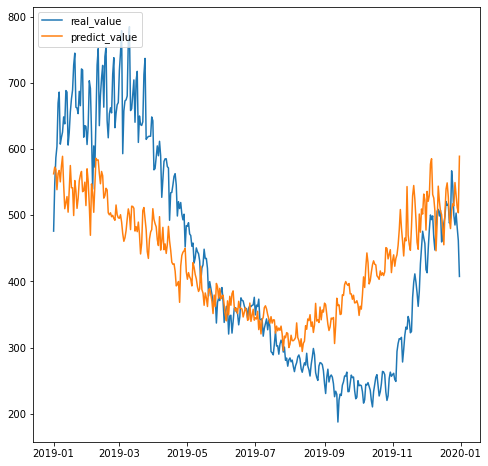

In [11]:
# 예측값 시각화하기. 
test_date = df_딸기_복분자_블루베리_raw.iloc[365:730,0]
test_date = test_date.astype('str')
test_date = pd.to_datetime(test_date)
plt.figure(figsize=(8,8))
plt.plot(test_date, y_test, label='real_value')
plt.plot(test_date, gscv_model_elastic_pred, label='predict_value')
plt.legend(loc='upper left')
plt.show()